# Data Management and Preprocessing

In this section, we will delve into the crucial aspects of data management and pre-processing in the context of preparing data for machine learning models. Properly handling and transforming the raw data are essential steps that significantly impact the performance and reliability of your models. We will explore various techniques using popular Python libraries, such as pandas and scikit-learn, to address common challenges in real-world datasets.


## Introduction:

Diving into the world of data management and pre-processing for financial services using a dataset from LendingClub. The goal is to apply essential data cleaning and transformation techniques to prepare the data for further analysis and modeling.

## Objective:

1. **Data Loading:**
   - Importing the LendingClub Loan Data dataset, limiting the import to three numeric variables and three character variables.
   - Visit the [LendingClub Dataset on Kaggle](https://www.kaggle.com/datasets/wordsforthewise/lending-club/).
      - Click on the "Download" button to obtain the dataset in ZIP format.
      - Locate the downloaded ZIP file (e.g., `loan.zip`). 
      - Extract the contents to reveal the CSV file (`accepted_2007_to_2018q4.csv`).
  
2. **Data Exploration:**
   - Conducting an initial exploration of the dataset, examining summary statistics and understanding the distribution of key variables.

3. **Handling Missing Values:**
   - Identifying and handling missing values for numeric variables using an appropriate strategy (e.g., imputation).

4. **Encoding Categorical Variables:**
   - Utilizing encoding techniques (e.g., one-hot encoding) for handling categorical variables.

5. **Scaling Numerical Features:**
   - Implementing scaling on numeric features to standardize their values.

## 1) Data Loading

In [1]:
# Import necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from pathlib import Path

current_dir = Path.cwd()
data_file = current_dir.parent / 'data' / '2_Accepted_subset_100000_v2.csv'

# Load the dataset
df = pd.read_csv(data_file, low_memory=False)
df.head()

,loan_amnt,annual_inc,dti,term,grade,purpose
0,3600.0,55000.0,5.91,36 months,C,debt_consolidation
1,24700.0,65000.0,16.06,36 months,C,small_business
2,20000.0,63000.0,10.78,60 months,B,home_improvement
3,35000.0,110000.0,17.06,60 months,C,debt_consolidation
4,10400.0,104433.0,25.37,60 months,F,major_purchase


Utilizing a subset of the original dataset provided due to memory issues. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   loan_amnt   100000 non-null  float64
 1   annual_inc  100000 non-null  float64
 2   dti         99998 non-null   float64
 3   term        100000 non-null  object 
 4   grade       100000 non-null  object 
 5   purpose     100000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.6+ MB


As you can see, we have three numerical variables and three categorical variables.

## 2) Data Exploration

In [3]:
# Summary statistics for numeric variables
numeric_summary = df[['loan_amnt', 'annual_inc', 'dti']]

numeric_summary.describe()

,loan_amnt,annual_inc,dti
count,100000.000000,1.000000e+05,99998.000000
mean,15055.861000,7.837135e+04,19.250957
std,8641.837441,8.929612e+04,9.627229
min,1000.000000,0.000000e+00,0.000000
25%,8000.000000,4.760000e+04,12.570000
50%,13875.000000,6.500000e+04,18.700000
75%,20000.000000,9.400000e+04,25.530000
max,35000.000000,9.000000e+06,999.000000


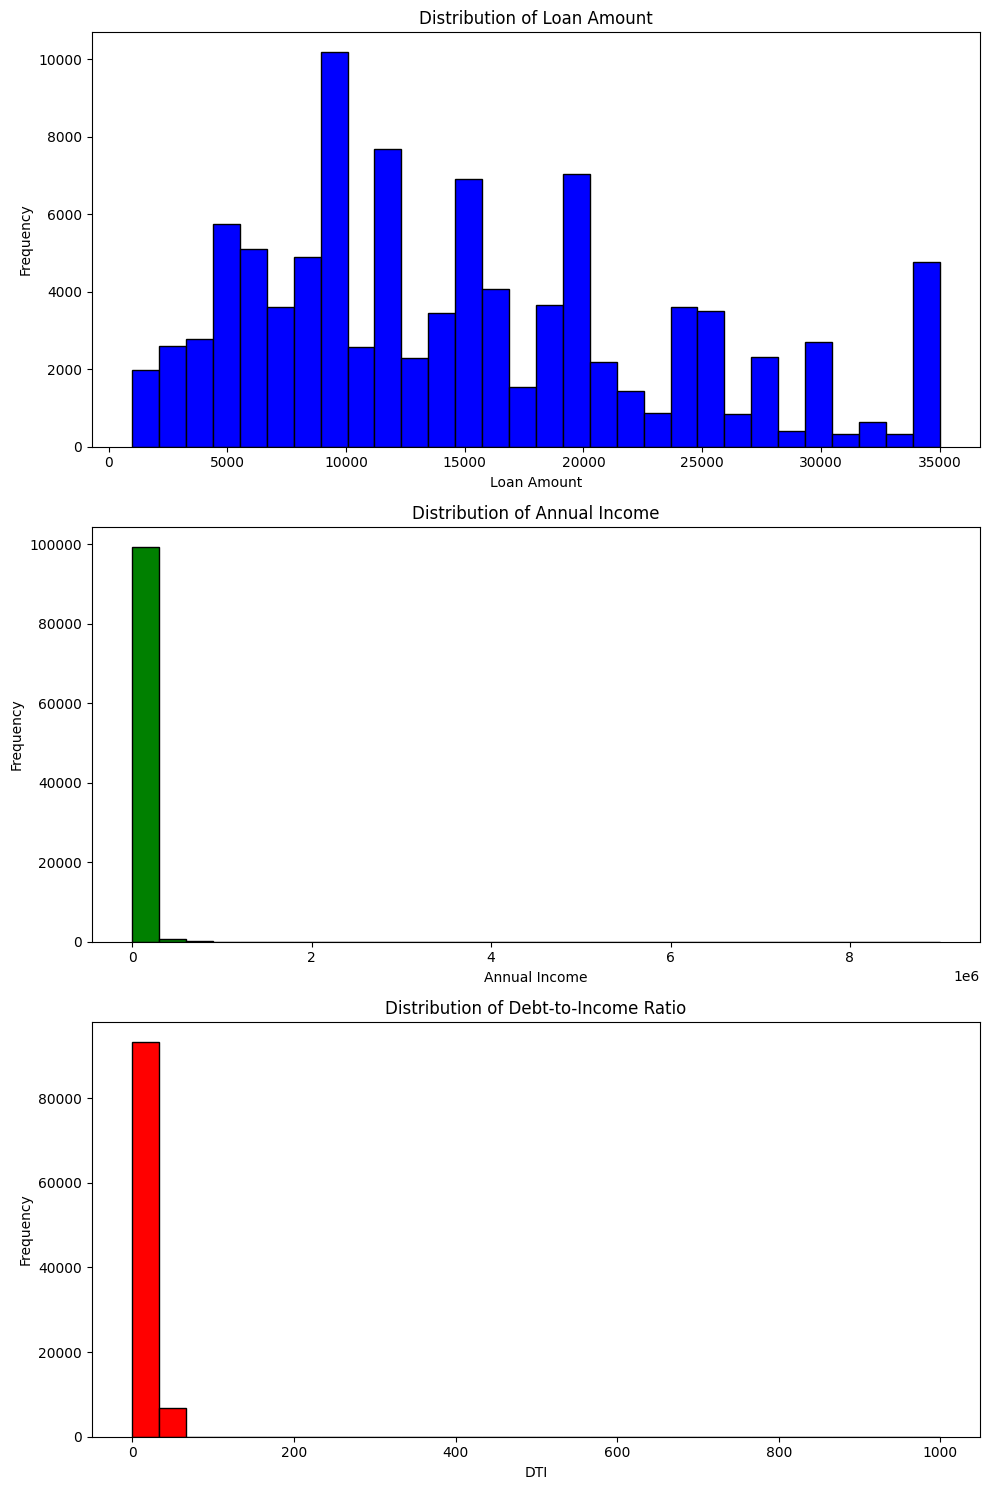

In [4]:
# Plotting the distribution of numeric variables
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Loan Amount Distribution
axs[0].hist(df['loan_amnt'].dropna(), bins=30, color='blue', edgecolor='black')
axs[0].set_title('Distribution of Loan Amount')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')

# Annual Income Distribution
axs[1].hist(df['annual_inc'].dropna(), bins=30, color='green', edgecolor='black')
axs[1].set_title('Distribution of Annual Income')
axs[1].set_xlabel('Annual Income')
axs[1].set_ylabel('Frequency')

# Debt-to-Income Ratio Distribution
axs[2].hist(df['dti'].dropna(), bins=30, color='red', edgecolor='black')
axs[2].set_title('Distribution of Debt-to-Income Ratio')
axs[2].set_xlabel('DTI')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

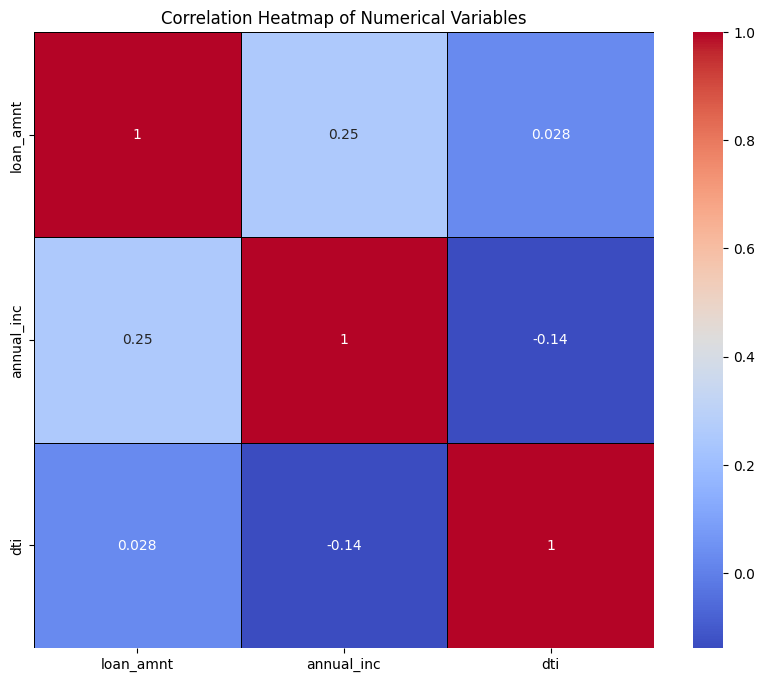

In [5]:
# Creating a heatmap for the numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = df[['loan_amnt', 'annual_inc', 'dti']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### There is a slight positive correlation between `loan_amnt` and `annual_inc`.
#### `dti` has a weak correlation with both `loan_amnt` and `annual_inc`.

In [6]:
# Frequency distribution of categorical variables

# Frequency distribution of 'term'
term_distribution = df['term'].value_counts()
print('The term distribution is: ', term_distribution)
print('\n')

# Frequency distribution of 'grade'
grade_distribution = df['grade'].value_counts()
print('The grade distribution is: ', grade_distribution)
print('\n')

# Frequency distribution of 'purpose'
purpose_distribution = df['purpose'].value_counts()
print('The purpose distribution is: ', purpose_distribution)
print('\n')

The term distribution is:  term
 36 months    68053
 60 months    31947
Name: count, dtype: int64


The grade distribution is:  grade
B    30772
C    29198
A    17493
D    13344
E     6951
F     1849
G      393
Name: count, dtype: int64


The purpose distribution is:  purpose
debt_consolidation    56914
credit_card           25312
home_improvement       6283
other                  5261
major_purchase         1951
medical                1109
small_business          868
car                     868
moving                  561
vacation                503
house                   314
renewable_energy         56
Name: count, dtype: int64




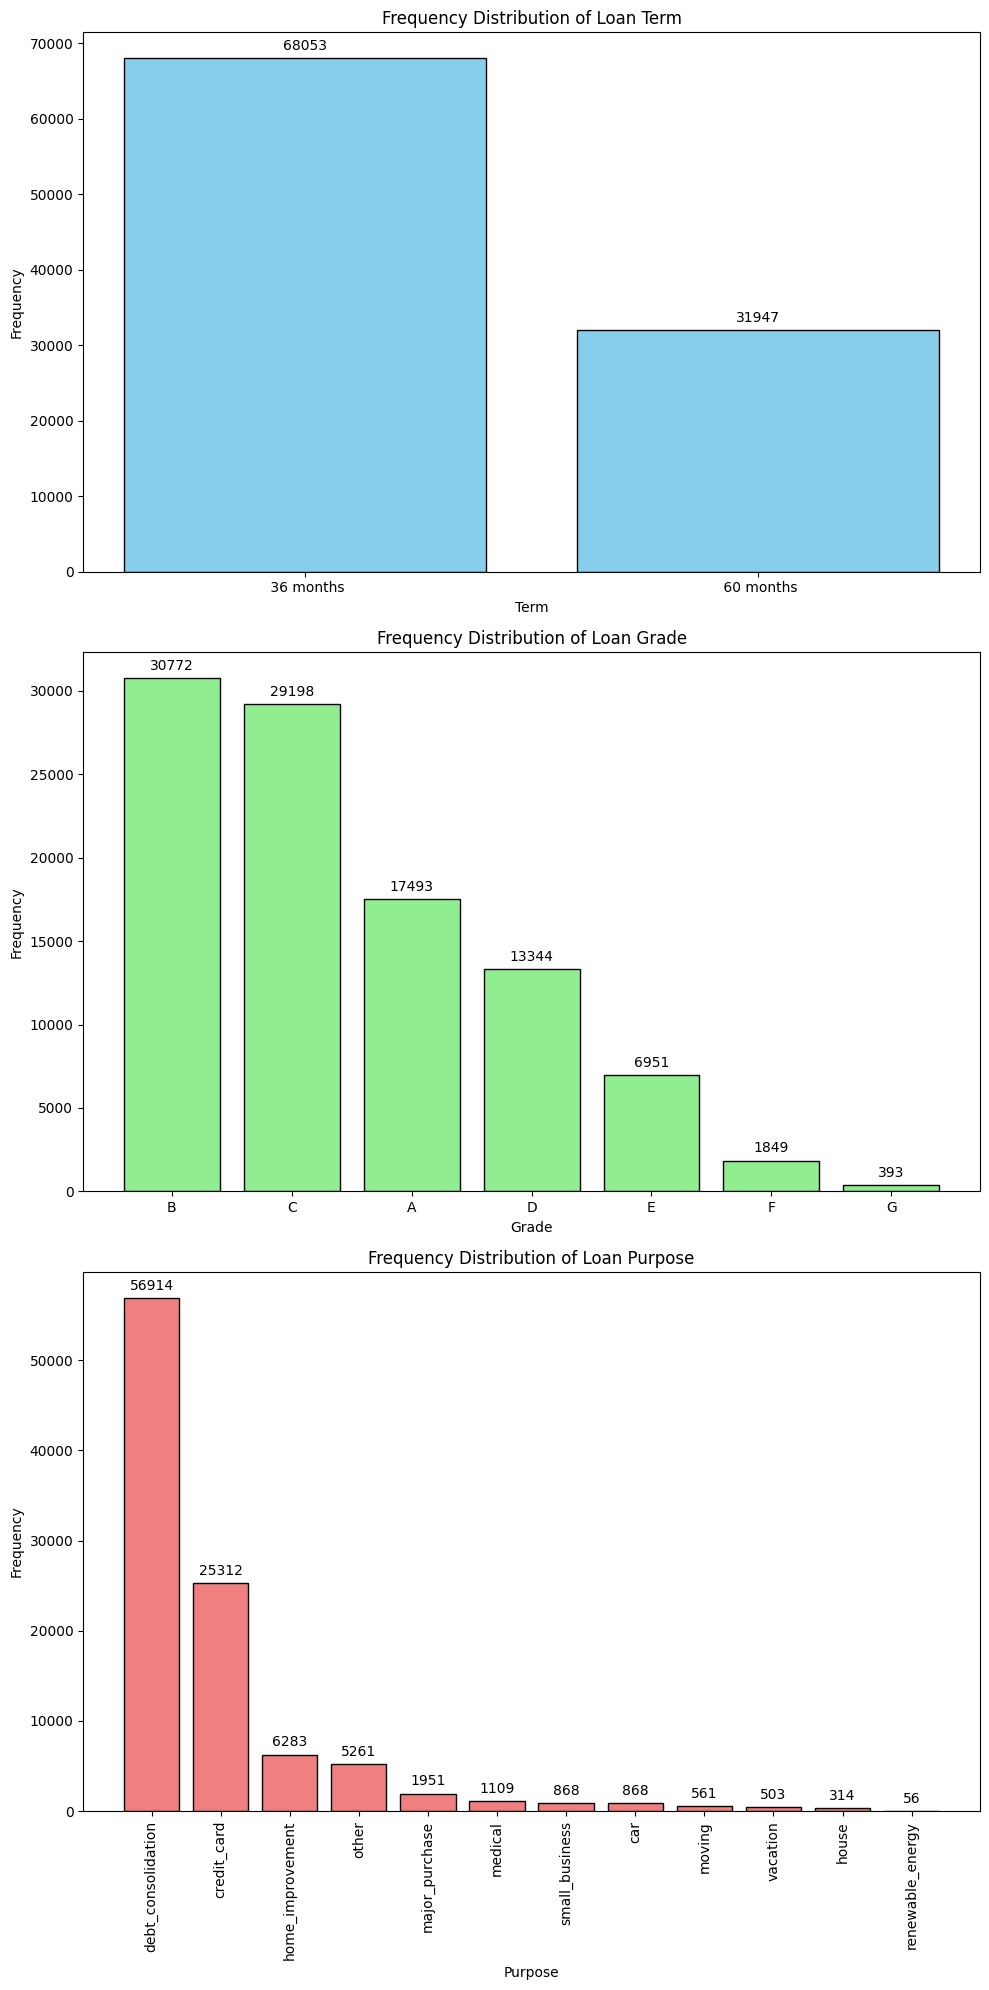

In [7]:
# Function to add counts on bars
def add_counts(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + max(values) * 0.01, str(v), ha='center', va='bottom')
        
# Plotting the frequency distribution of categorical variables
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# Term Distribution
axs[0].bar(term_distribution.index, term_distribution.values, color='skyblue', edgecolor='black')
add_counts(axs[0], term_distribution.values)
axs[0].set_title('Frequency Distribution of Loan Term')
axs[0].set_xlabel('Term')
axs[0].set_ylabel('Frequency')

# Grade Distribution
axs[1].bar(grade_distribution.index, grade_distribution.values, color='lightgreen', edgecolor='black')
add_counts(axs[1], grade_distribution.values)
axs[1].set_title('Frequency Distribution of Loan Grade')
axs[1].set_xlabel('Grade')
axs[1].set_ylabel('Frequency')

# Purpose Distribution
axs[2].bar(purpose_distribution.index, purpose_distribution.values, color='lightcoral', edgecolor='black')
add_counts(axs[2], purpose_distribution.values)
axs[2].set_title('Frequency Distribution of Loan Purpose')
axs[2].set_xlabel('Purpose')
axs[2].set_ylabel('Frequency')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Loan Term: The majority of loans have a term of 36 months compared to 60 months.
#### Loan Grade: Most loans are graded as B and C, with fewer loans graded as F and G.
#### Loan Purpose: The most common purposes for loans are debt consolidation and credit card refinancing, followed by home improvement and other categories.

## 3) Handling Missing Values

In [8]:
# Identify missing values in numeric columns
missing_values = df[['loan_amnt', 'annual_inc', 'dti']].isnull().sum()
missing_values

loan_amnt     0
annual_inc    0
dti           2
dtype: int64

#### There are no missing values in the `loan_amt` and `annual_inc` columns. However, there are two missing values in the `dti` column. 

In [9]:
# Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df['dti'] = imputer.fit_transform(df[['dti']])

missing_values = df[['loan_amnt', 'annual_inc', 'dti']].isnull().sum()
missing_values

loan_amnt     0
annual_inc    0
dti           0
dtype: int64

#### We have successfully imputed the missing values with the mean of the respective column. 

## 4) Encoding Categorical Variables

In [10]:
# Encoding categorical variables using LabelEncoder 
le = LabelEncoder()
df['term'] = le.fit_transform(df['term'])
df['grade'] = le.fit_transform(df['grade'])
df['purpose'] = le.fit_transform(df['purpose'])

In [11]:
df.head()

,loan_amnt,annual_inc,dti,term,grade,purpose
0,3600.0,55000.0,5.91,0,2,2
1,24700.0,65000.0,16.06,0,2,10
2,20000.0,63000.0,10.78,1,1,3
3,35000.0,110000.0,17.06,1,2,2
4,10400.0,104433.0,25.37,1,5,5


#### As we can see from the above dataframe, categorical variables have been successfully one-hot encoded. 

## 5) Scaling Numerical Features

In [12]:
# Scaling numerical features using StandardScaler
scaler = StandardScaler()
df[['loan_amnt', 'annual_inc', 'dti']] = scaler.fit_transform(df[['loan_amnt', 'annual_inc', 'dti']])

In [13]:
df.head()

,loan_amnt,annual_inc,dti,term,grade,purpose
0,-1.325635,-0.261730,-1.385773,0,2,2
1,1.115988,-0.149742,-0.331456,0,2,10
2,0.572120,-0.172140,-0.879909,1,1,3
3,2.307870,0.354201,-0.227583,1,2,2
4,-0.538761,0.291858,0.635607,1,5,5


#### As we can see from the above dataframe, numerical variables have been successfully scaled.  

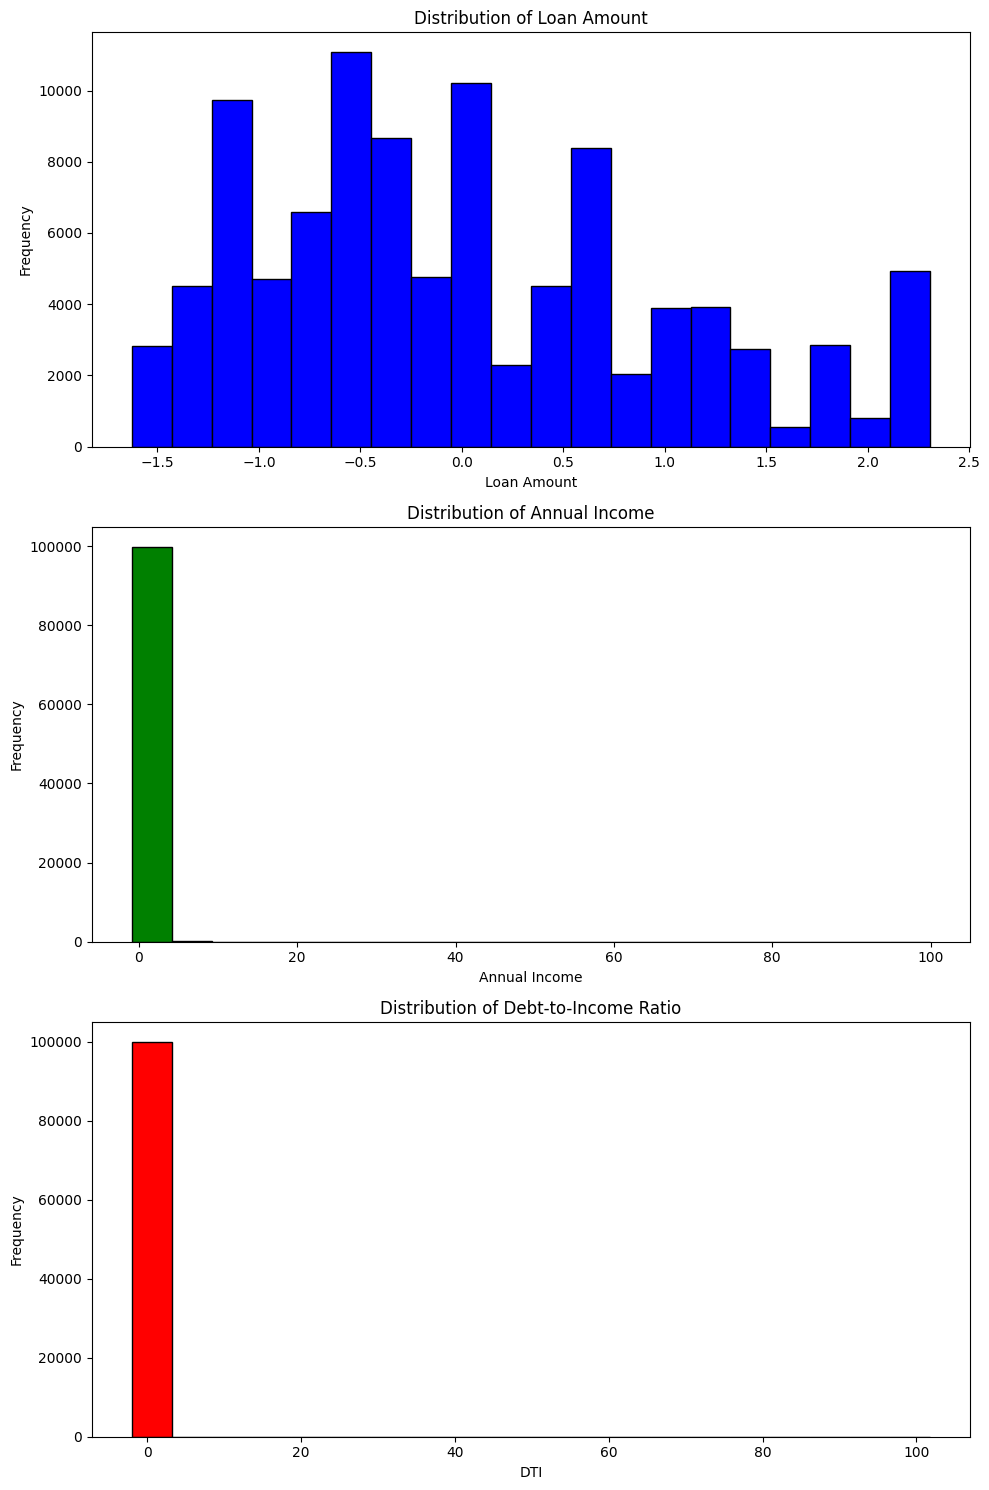

In [14]:
# Visualize the preprocessed numeric variables
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Loan Amount Distribution
axs[0].hist(df['loan_amnt'], bins=20, color='blue', edgecolor='black')
axs[0].set_title('Distribution of Loan Amount')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')

# Annual Income Distribution
axs[1].hist(df['annual_inc'], bins=20, color='green', edgecolor='black')
axs[1].set_title('Distribution of Annual Income')
axs[1].set_xlabel('Annual Income')
axs[1].set_ylabel('Frequency')

# Debt-to-Income Ratio Distribution
axs[2].hist(df['dti'], bins=20, color='red', edgecolor='black')
axs[2].set_title('Distribution of Debt-to-Income Ratio')
axs[2].set_xlabel('DTI')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()